# Data Modeling for Capstone 3 - Diamond Price Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn import metrics

In [2]:
# Load training and test data

X_train = pd.read_csv('../Data/Proc/X_train.csv')
X_test = pd.read_csv('../Data/Proc/X_test.csv')
y_train = pd.read_csv('../Data/Proc/y_train.csv')
y_test = pd.read_csv('../Data/Proc/y_test.csv')

In [3]:
X_train.shape, X_test.shape

((37741, 24), (16176, 24))

In [4]:
y_train.shape, y_test.shape

((37741, 1), (16176, 1))

### AdaBoost Regressor Model

In [5]:
pipe_Ada = make_pipeline(AdaBoostRegressor(random_state=42))

In [6]:
pipe_Ada.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'adaboostregressor', 'adaboostregressor__base_estimator', 'adaboostregressor__learning_rate', 'adaboostregressor__loss', 'adaboostregressor__n_estimators', 'adaboostregressor__random_state'])

In [7]:
gridparams_Ada = {'adaboostregressor__n_estimators':[10, 50, 100, 500],
                  'adaboostregressor__learning_rate':[0.001, 0.01, 0.1, 1.0],
                 }

gridparams_Ada

{'adaboostregressor__n_estimators': [10, 50, 100, 500],
 'adaboostregressor__learning_rate': [0.001, 0.01, 0.1, 1.0]}

In [8]:
clf_Ada = GridSearchCV(pipe_Ada,
                       param_grid=gridparams_Ada,
                       cv=5,
                       n_jobs=-1
                      )

clf_Ada.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('adaboostregressor',
                                        AdaBoostRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'adaboostregressor__learning_rate': [0.001, 0.01, 0.1,
                                                              1.0],
                         'adaboostregressor__n_estimators': [10, 50, 100, 500]})

In [9]:
clf_Ada.best_params_

{'adaboostregressor__learning_rate': 0.01,
 'adaboostregressor__n_estimators': 100}

In [10]:
clf_Ada_scores = cross_val_score(clf_Ada, X_train, y_train.values.ravel(), cv=5)
clf_Ada_scores

array([0.88423641, 0.87747274, 0.88678888, 0.88076887, 0.88470517])

In [11]:
y_pred_Ada = clf_Ada.predict(X_test)

AdaB_score = clf_Ada.score(X_test, y_test)

AdaB_mae = metrics.mean_absolute_error(y_test, y_pred_Ada)
AdaB_mse = metrics.mean_squared_error(y_test, y_pred_Ada)
AdaB_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ada))

print('SCORE:', AdaB_score)

print('MAE:', AdaB_mae)
print('MSE:', AdaB_mse)
print('RMSE:', AdaB_rmse)

SCORE: 0.8809160655438066
MAE: 787.8100768894918
MSE: 1872091.742512013
RMSE: 1368.2440361689917


In [12]:
clf_Ada_scores.mean(), clf_Ada_scores.std()

(0.8827944134447673, 0.00328965700912989)

### Random Forest Regressor Model

In [15]:
# Instantiate Random Forest Regressor

pipe_RF = make_pipeline(RandomForestRegressor(random_state=42))

In [16]:
# Check Parameters

pipe_RF.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'randomforestregressor', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_impurity_split', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregressor__warm_start'])

In [17]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]

gridparams_RF = {'randomforestregressor__n_estimators': n_est,
                 'randomforestregressor__max_depth': [1, 2, 5, 10]
                }
gridparams_RF

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'randomforestregressor__max_depth': [1, 2, 5, 10]}

In [19]:
clf_RF = GridSearchCV(pipe_RF,
                      param_grid=gridparams_RF,
                      cv=5,
                      n_jobs=-1
                     )

clf_RF.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [1, 2, 5, 10],
                         'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000]})

In [21]:
clf_RF.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__n_estimators': 1000}

In [23]:
clf_RF_scores = cross_val_score(clf_RF.best_estimator_, X_train, y_train.values.ravel(), cv=5)
clf_RF_scores

array([0.95973163, 0.95466996, 0.96269082, 0.96252881, 0.96428687])

In [24]:
y_pred_RF = clf_RF.predict(X_test)

RF_score = clf_RF.score(X_test, y_test)

RF_mae = metrics.mean_absolute_error(y_test, y_pred_RF)
RF_mse = metrics.mean_squared_error(y_test, y_pred_RF)
RF_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))

print('SCORE:', RF_score)

print('MAE:', RF_mae)
print('MSE:', RF_mse)
print('RMSE:', RF_rmse)

SCORE: 0.9608667273339727
MAE: 393.0260281409964
MSE: 615205.3755201622
RMSE: 784.3502887869438


In [25]:
clf_RF_scores.mean(), clf_RF_scores.std()

(0.960781619720475, 0.0033893787917576067)

In [42]:
# Random Search Grid setup

n_estimators = [int(x) for x in np.linspace(start = 0, stop = 2000, num = 21)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 110, num = 12)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}

print(random_grid)

{'randomforestregressor__n_estimators': [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'randomforestregressor__max_features': ['auto', 'sqrt'], 'randomforestregressor__max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'randomforestregressor__min_samples_split': [2, 5, 10], 'randomforestregressor__min_samples_leaf': [1, 2, 4], 'randomforestregressor__bootstrap': [True, False]}


In [43]:
rf_random = RandomizedSearchCV(estimator = pipe_RF,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)
rf_random.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 93.4min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('randomforestregressor',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [1,
                                                                             10,
                                                                             20,
                                                                             30,
                                                                             40,
                                                                             50,
                                                                             60,
                                       

In [44]:
rf_random.best_params_

{'randomforestregressor__n_estimators': 1700,
 'randomforestregressor__min_samples_split': 5,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_depth': 20,
 'randomforestregressor__bootstrap': True}

In [58]:
# Updated Grid Parameters for Second RF Regressor Test

gridparams_RF2 = {'randomforestregressor__n_estimators': [100, 500, 1000, 1500, 1700, 2000],
                 'randomforestregressor__max_depth': [5, 10, 20, None]
                }
gridparams_RF2

{'randomforestregressor__n_estimators': [100, 500, 1000, 1500, 1700, 2000],
 'randomforestregressor__max_depth': [5, 10, 20, None]}

In [59]:
# Second Test of RF Regressor w/ Random Search optimized parameters

clf_RF2 = GridSearchCV(pipe_RF,
                      param_grid=gridparams_RF2,
                      cv=5,
                      n_jobs=-1
                     )

clf_RF2.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 10, 20, None],
                         'randomforestregressor__n_estimators': [100, 500, 1000,
                                                                 1500, 1700,
                                                                 2000]})

In [63]:
clf_RF2.best_params_

{'randomforestregressor__max_depth': 20,
 'randomforestregressor__n_estimators': 1700}

In [64]:
clf_RF2_scores = cross_val_score(clf_RF2.best_estimator_, X_train, y_train.values.ravel(), cv=5)
clf_RF2_scores

array([0.97240611, 0.96664858, 0.9757011 , 0.97392475, 0.97525115])

In [65]:
y_pred_RF2 = clf_RF2.predict(X_test)

RF2_score = clf_RF2.score(X_test, y_test)

RF2_mae = metrics.mean_absolute_error(y_test, y_pred_RF2)
RF2_mse = metrics.mean_squared_error(y_test, y_pred_RF2)
RF2_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF2))

print('SCORE:', RF2_score)

print('MAE:', RF2_mae)
print('MSE:', RF2_mse)
print('RMSE:', RF2_rmse)

SCORE: 0.9744678786235477
MAE: 292.56025942843524
MSE: 401384.73603468394
RMSE: 633.5493161820033


### Gradient Boosting Regressor Model

In [26]:
pipe_GBR = make_pipeline(GradientBoostingRegressor(random_state=42))

In [27]:
pipe_GBR.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'gradientboostingregressor', 'gradientboostingregressor__alpha', 'gradientboostingregressor__ccp_alpha', 'gradientboostingregressor__criterion', 'gradientboostingregressor__init', 'gradientboostingregressor__learning_rate', 'gradientboostingregressor__loss', 'gradientboostingregressor__max_depth', 'gradientboostingregressor__max_features', 'gradientboostingregressor__max_leaf_nodes', 'gradientboostingregressor__min_impurity_decrease', 'gradientboostingregressor__min_impurity_split', 'gradientboostingregressor__min_samples_leaf', 'gradientboostingregressor__min_samples_split', 'gradientboostingregressor__min_weight_fraction_leaf', 'gradientboostingregressor__n_estimators', 'gradientboostingregressor__n_iter_no_change', 'gradientboostingregressor__presort', 'gradientboostingregressor__random_state', 'gradientboostingregressor__subsample', 'gradientboostingregressor__tol', 'gradientboostingregressor__validation_fraction', 'gradientboostingregressor

In [31]:
gridparams_GBR = {'gradientboostingregressor__n_estimators':[10, 50, 100, 500],
                  'gradientboostingregressor__learning_rate':[0.001, 0.01, 0.1, 1.0],
                  'gradientboostingregressor__max_depth':[1, 2, 5, 10],
                 }

gridparams_GBR

{'gradientboostingregressor__n_estimators': [10, 50, 100, 500],
 'gradientboostingregressor__learning_rate': [0.001, 0.01, 0.1, 1.0],
 'gradientboostingregressor__max_depth': [1, 2, 5, 10]}

In [32]:
clf_GBR = GridSearchCV(pipe_GBR,
                       param_grid=gridparams_GBR,
                       cv=5,
                       n_jobs=-1
                      )

clf_GBR.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.001,
                                                                      0.01, 0.1,
                                                                      1.0],
                         'gradientboostingregressor__max_depth': [1, 2, 5, 10],
                         'gradientboostingregressor__n_estimators': [10, 50,
                                                                     100,
                                                                     500]})

In [33]:
clf_GBR.best_params_

{'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__max_depth': 5,
 'gradientboostingregressor__n_estimators': 500}

In [35]:
clf_GBR_scores = cross_val_score(clf_GBR.best_estimator_, X_train, y_train.values.ravel(), cv=5)
clf_GBR_scores

array([0.97942083, 0.97400554, 0.97894546, 0.97666256, 0.97780105])

In [36]:
y_pred_GBR = clf_GBR.predict(X_test)

GBR_score = clf_GBR.score(X_test, y_test)

GBR_mae = metrics.mean_absolute_error(y_test, y_pred_GBR)
GBR_mse = metrics.mean_squared_error(y_test, y_pred_GBR)
GBR_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_GBR))

print('SCORE:', GBR_score)

print('MAE:', GBR_mae)
print('MSE:', GBR_mse)
print('RMSE:', GBR_rmse)

SCORE: 0.9786062740453627
MAE: 289.15704410732855
MSE: 336325.9526495962
RMSE: 579.936162564119


In [37]:
clf_GBR_scores.mean(), clf_GBR_scores.std()

(0.9773670881225573, 0.0019335867546567788)

### Model Metrics and Comparison

In [67]:
scores_grid = {'Model':['AdaBoostReg', 'RandomForestReg', 'RandomForestReg2', 'GradientBoostReg'],
            'Score':[AdaB_score, RF_score, RF2_score, GBR_score],
            'MAE':[AdaB_mae, RF_mae, RF2_mae, GBR_mae],
            'MSE':[AdaB_mse, RF_mse, RF2_mse, GBR_mse],
            'RMSE':[AdaB_rmse, RF_rmse, RF2_rmse, GBR_rmse]}

scores_df = pd.DataFrame(scores_grid)

scores_df

,Model,Score,MAE,MSE,RMSE
0,AdaBoostReg,0.880916,787.810077,1.872092e+06,1368.244036
1,RandomForestReg,0.960867,393.026028,6.152054e+05,784.350289
2,RandomForestReg2,0.974468,292.560259,4.013847e+05,633.549316
3,GradientBoostReg,0.978606,289.157044,3.363260e+05,579.936163


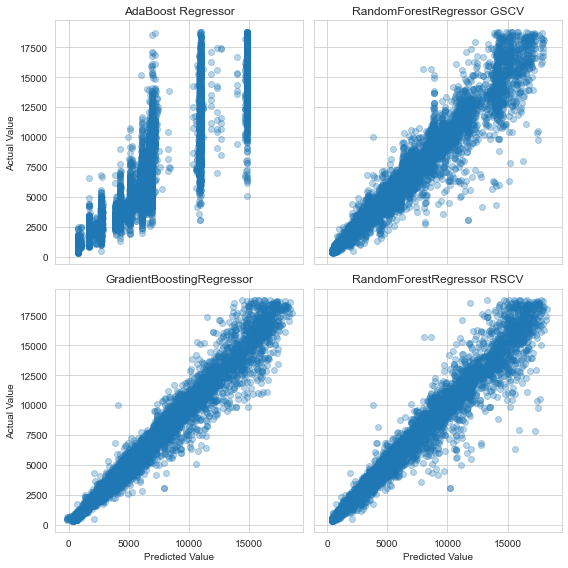

In [83]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,8))

ax[0,0].scatter(y_pred_Ada, y_test, alpha=0.3)
ax[0,1].scatter(y_pred_RF, y_test, alpha=0.3)
ax[1,1].scatter(y_pred_RF2, y_test, alpha=0.3)
ax[1,0].scatter(y_pred_GBR, y_test, alpha=0.3)

ax[0,0].set_title('AdaBoost Regressor')
ax[0,1].set_title('RandomForestRegressor GSCV')
ax[1,0].set_title('GradientBoostingRegressor')
ax[1,1].set_title('RandomForestRegressor RSCV')

for i, row in enumerate(ax):
    for j, cell in enumerate(row):
        if i == len(ax) - 1:
            cell.set_xlabel('Predicted Value')
        if j == 0:
            cell.set_ylabel('Actual Value')

plt.tight_layout()


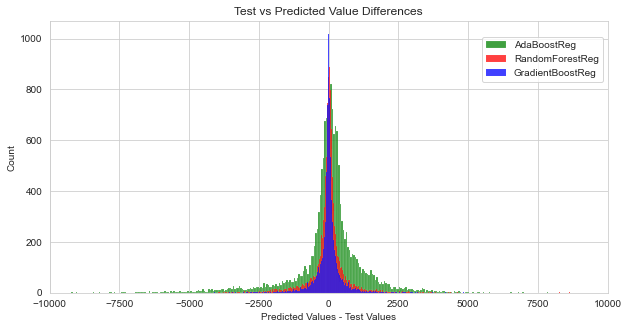

In [139]:
fig = plt.figure(figsize=(10,5))

sns.histplot(y_pred_Ada-y_test.values.ravel(), color='g')
sns.histplot(y_pred_RF-y_test.values.ravel(), color='r')
sns.histplot(y_pred_GBR-y_test.values.ravel(), color='blue')

plt.xlabel('Predicted Values - Test Values')
plt.title('Test vs Predicted Value Differences')
plt.xlim((-10000,10000))
fig.legend(labels=['AdaBoostReg','RandomForestReg','GradientBoostReg'],loc='upper right', bbox_to_anchor=(0.9, 0.85))
plt.show();

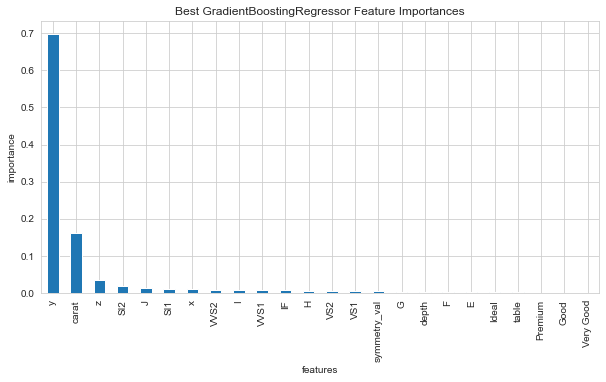

In [85]:
plt.subplots(figsize=(10, 5))

imps_GBR = clf_GBR.best_estimator_.named_steps.gradientboostingregressor.feature_importances_
grb_feat_imps_GBR = pd.Series(imps_GBR, index=X_train.columns).sort_values(ascending=False)

grb_feat_imps_GBR.plot(kind='bar')

plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best GradientBoostingRegressor Feature Importances');

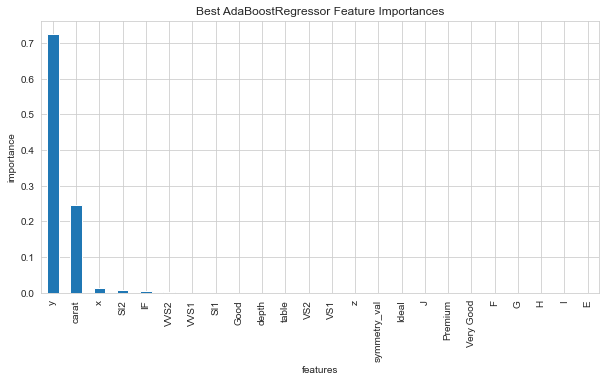

In [88]:
plt.subplots(figsize=(10, 5))

imps_AdaB = clf_Ada.best_estimator_.named_steps.adaboostregressor.feature_importances_
grb_feat_imps_AdaB = pd.Series(imps_AdaB, index=X_train.columns).sort_values(ascending=False)

grb_feat_imps_AdaB.plot(kind='bar')

plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best AdaBoostRegressor Feature Importances');

''

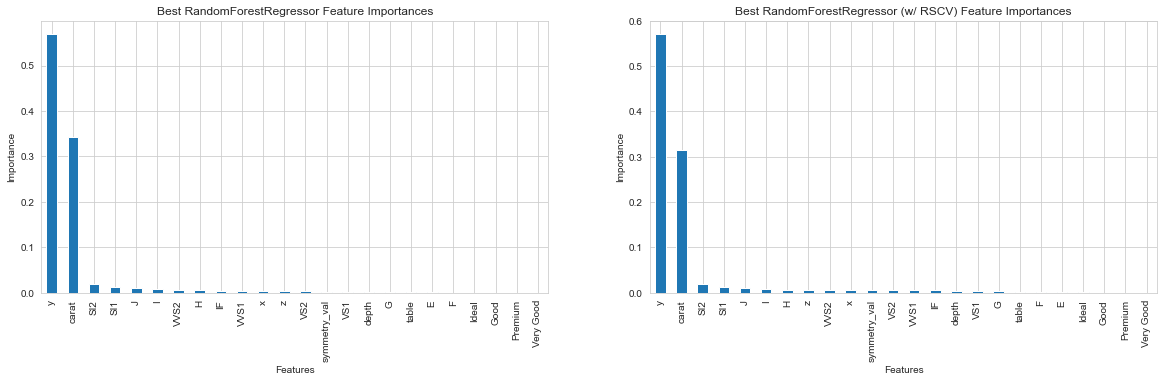

In [98]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))

imps_RF = clf_RF.best_estimator_.named_steps.randomforestregressor.feature_importances_
grb_feat_imps_RF = pd.Series(imps_RF, index=X_train.columns).sort_values(ascending=False)

imps_RF2 = clf_RF2.best_estimator_.named_steps.randomforestregressor.feature_importances_
grb_feat_imps_RF2 = pd.Series(imps_RF2, index=X_train.columns).sort_values(ascending=False)


grb_feat_imps_RF.plot(kind='bar', ax=ax[0])
grb_feat_imps_RF2.plot(kind='bar', ax=ax[1])


ax[0].set_title('Best RandomForestRegressor Feature Importances')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Importance')
ax[1].set_title('Best RandomForestRegressor (w/ RSCV) Feature Importances')
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Importance')

;

### Scenario Testing

In [140]:
X_train.head(), X_test.head()

(   carat  depth  table     x     y     z  symmetry_val  Good  Ideal  Premium  \
 0   1.07   62.0   57.0  6.52  6.57  4.06      0.992390     0      1        0   
 1   1.02   59.1   60.0  6.61  6.51  3.88      1.015361     0      0        0   
 2   0.59   62.2   59.0  5.38  5.34  3.33      1.007491     0      1        0   
 3   1.00   61.3   60.0  6.39  6.43  3.93      0.993779     0      0        1   
 4   1.44   63.2   54.8  7.18  7.21  4.54      0.995839     1      0        0   
 
    ...  H  I  J  IF  SI1  SI2  VS1  VS2  VVS1  VVS2  
 0  ...  0  0  0   1    0    0    0    0     0     0  
 1  ...  0  0  0   0    0    0    0    1     0     0  
 2  ...  1  0  0   0    0    0    0    1     0     0  
 3  ...  1  0  0   0    0    0    0    0     0     0  
 4  ...  0  0  0   0    0    0    0    0     0     0  
 
 [5 rows x 24 columns],
    carat  depth  table     x     y     z  symmetry_val  Good  Ideal  Premium  \
 0   0.30   62.6   58.0  4.27  4.32  2.69      0.988426     0      0       

In [141]:
y_train.head(), y_test.head()

(   price
 0  11434
 1   6762
 2   1648
 3   2695
 4   5987,
    price
 0    394
 1   5941
 2   5418
 3   5404
 4   2095)

In [142]:
X_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'symmetry_val', 'Good',
       'Ideal', 'Premium', 'Very Good', 'E', 'F', 'G', 'H', 'I', 'J', 'IF',
       'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='object')

In [143]:
pipe_GBR2 = make_pipeline(GradientBoostingRegressor(random_state=42))

#### *Senario 1: No Dimensional Data*

##### *Dimensional columns include data that is more granular than most diamond dealers/retailers can specify, so the first scenario will test the ability of a model to predict price without this information*

In [144]:
# Drop Dimension columns (x,y,z) all others

X_train_DimDrop = X_train.drop(['x','y','z','symmetry_val'], axis=1)
X_test_DimDrop = X_test.drop(['x','y','z','symmetry_val'], axis=1)

In [145]:
gridparams_DimDrop = {'gradientboostingregressor__n_estimators':[50, 100, 500, 1000],
                  'gradientboostingregressor__learning_rate':[0.001, 0.01, 0.1, 1.0],
                  'gradientboostingregressor__max_depth':[5, 10, 20],
                 }

gridparams_DimDrop

{'gradientboostingregressor__n_estimators': [50, 100, 500, 1000],
 'gradientboostingregressor__learning_rate': [0.001, 0.01, 0.1, 1.0],
 'gradientboostingregressor__max_depth': [5, 10, 20]}

In [146]:
clf_GBR_DimDrop = GridSearchCV(pipe_GBR2,
                       param_grid=gridparams_DimDrop,
                       cv=5,
                       n_jobs=-1
                      )

clf_GBR_DimDrop.fit(X_train_DimDrop, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.001,
                                                                      0.01, 0.1,
                                                                      1.0],
                         'gradientboostingregressor__max_depth': [5, 10, 20],
                         'gradientboostingregressor__n_estimators': [50, 100,
                                                                     500,
                                                                     1000]})

In [147]:
clf_GBR_DimDrop.best_params_

{'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__max_depth': 5,
 'gradientboostingregressor__n_estimators': 1000}

In [148]:
clf_GBR_DimDropscores = cross_val_score(clf_GBR_DimDrop.best_estimator_, X_train_DimDrop, y_train.values.ravel(), cv=5)

clf_GBR_DimDropscores

array([0.97971969, 0.97700354, 0.98084875, 0.9782005 , 0.97767877])

In [149]:
y_pred_DimDrop = clf_GBR_DimDrop.predict(X_test_DimDrop)

DimDrop_score = clf_GBR_DimDrop.score(X_test_DimDrop, y_test)

DimDrop_mae = metrics.mean_absolute_error(y_test, y_pred_DimDrop)
DimDrop_mse = metrics.mean_squared_error(y_test, y_pred_DimDrop)
DimDrop_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_DimDrop))

print('SCORE:', DimDrop_score)

print('MAE:', DimDrop_mae)
print('MSE:', DimDrop_mse)
print('RMSE:', DimDrop_rmse)

SCORE: 0.9807388180015627
MAE: 281.66136494885785
MSE: 302800.7088862193
RMSE: 550.2733038102242


In [150]:
clf_GBR_DimDropscores.mean(), clf_GBR_DimDropscores.std()

(0.9786902496217443, 0.001401913581489067)

#### *Scenario 2: Only "4 C's" data*

##### *Most commonly reported characteristics of diamonds, the "4 C's" represent the quality, integrity, and size of a diamond. This will be a test to determine how well these characteristics, devoid of any size dimensions or table/depth measurement, predict the diamond price.*

In [151]:
# Only '4 C's', drop all others

X_train_4Cs = X_train.drop(['x','y','z','symmetry_val','depth','table'], axis=1)
X_test_4Cs = X_test.drop(['x','y','z','symmetry_val','depth','table'], axis=1)

In [152]:
gridparams_4Cs = {'gradientboostingregressor__n_estimators':[50, 100, 500, 1000],
                  'gradientboostingregressor__learning_rate':[0.001, 0.01, 0.1, 1.0],
                  'gradientboostingregressor__max_depth':[5, 10, 20],
                 }

gridparams_4Cs

{'gradientboostingregressor__n_estimators': [50, 100, 500, 1000],
 'gradientboostingregressor__learning_rate': [0.001, 0.01, 0.1, 1.0],
 'gradientboostingregressor__max_depth': [5, 10, 20]}

In [153]:
clf_GBR_4Cs = GridSearchCV(pipe_GBR2,
                       param_grid=gridparams_4Cs,
                       cv=5,
                       n_jobs=-1
                      )

clf_GBR_4Cs.fit(X_train_4Cs, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.001,
                                                                      0.01, 0.1,
                                                                      1.0],
                         'gradientboostingregressor__max_depth': [5, 10, 20],
                         'gradientboostingregressor__n_estimators': [50, 100,
                                                                     500,
                                                                     1000]})

In [154]:
clf_GBR_4Cs.best_params_

{'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__max_depth': 5,
 'gradientboostingregressor__n_estimators': 1000}

In [155]:
clf_GBR_4CsScores = cross_val_score(clf_GBR_4Cs.best_estimator_, X_train_4Cs, y_train.values.ravel(), cv=5)

clf_GBR_4CsScores

array([0.97953377, 0.97679548, 0.98032878, 0.97910259, 0.97775535])

In [156]:
y_pred_4Cs = clf_GBR_4Cs.predict(X_test_4Cs)

Cs_score = clf_GBR_4Cs.score(X_test_4Cs, y_test)

Cs_mae = metrics.mean_absolute_error(y_test, y_pred_4Cs)
Cs_mse = metrics.mean_squared_error(y_test, y_pred_4Cs)
Cs_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_4Cs))

print('SCORE:', Cs_score)

print('MAE:', Cs_mae)
print('MSE:', Cs_mse)
print('RMSE:', Cs_rmse)

SCORE: 0.9799985343498206
MAE: 287.2411536428142
MSE: 314438.5416289129
RMSE: 560.7481980612268


In [157]:
clf_GBR_4CsScores.mean(), clf_GBR_4CsScores.std()

(0.9787031949541227, 0.0012672551536595227)

#### *Scenario 3: Only the highest quality diamonds*

##### *Perhaps a store only wants the highest quality diamonds.*

In [158]:
# Only 'Carat' and High Quality 'Cut' & 'Clarity' values

X_train_HiQ = X_train[['carat','Premium','Ideal','Very Good','IF', 'VVS1', 'VVS2']]
X_test_HiQ = X_test[['carat','Premium','Ideal','Very Good','IF', 'VVS1', 'VVS2']]

In [159]:
gridparams_HiQ = {'gradientboostingregressor__n_estimators':[50, 100, 500, 1000],
                  'gradientboostingregressor__learning_rate':[0.001, 0.01, 0.1, 1.0],
                  'gradientboostingregressor__max_depth':[5, 10, 20],
                 }

gridparams_HiQ

{'gradientboostingregressor__n_estimators': [50, 100, 500, 1000],
 'gradientboostingregressor__learning_rate': [0.001, 0.01, 0.1, 1.0],
 'gradientboostingregressor__max_depth': [5, 10, 20]}

In [160]:
clf_GBR_HiQ = GridSearchCV(pipe_GBR2,
                       param_grid=gridparams_HiQ,
                       cv=5,
                       n_jobs=-1
                      )

clf_GBR_HiQ.fit(X_train_HiQ, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.001,
                                                                      0.01, 0.1,
                                                                      1.0],
                         'gradientboostingregressor__max_depth': [5, 10, 20],
                         'gradientboostingregressor__n_estimators': [50, 100,
                                                                     500,
                                                                     1000]})

In [161]:
clf_GBR_HiQ.best_params_

{'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__max_depth': 5,
 'gradientboostingregressor__n_estimators': 50}

In [162]:
clf_GBR_HiQscores = cross_val_score(clf_GBR_HiQ.best_estimator_, X_train_HiQ, y_train.values.ravel(), cv=5)

clf_GBR_HiQscores

array([0.90671528, 0.90755652, 0.91074856, 0.90684516, 0.90734315])

In [163]:
y_pred_HiQ = clf_GBR_HiQ.predict(X_test_HiQ)

HiQ_score = clf_GBR_HiQ.score(X_test_HiQ, y_test)

HiQ_mae = metrics.mean_absolute_error(y_test, y_pred_HiQ)
HiQ_mse = metrics.mean_squared_error(y_test, y_pred_HiQ)
HiQ_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_HiQ))

print('SCORE:', HiQ_score)

print('MAE:', HiQ_mae)
print('MSE:', HiQ_mse)
print('RMSE:', HiQ_rmse)

SCORE: 0.9066206262017501
MAE: 681.3333343324623
MSE: 1467996.1273277737
RMSE: 1211.6089003171667


In [164]:
clf_GBR_HiQscores.mean(), clf_GBR_HiQscores.std()

(0.9078417340608013, 0.001486044683118866)

#### *Metric Comparison from Scenarios*

In [165]:
scenario_grid = {'Model':['GradientBoostReg','GBR - Drop Dimensions', "GBR - 4C's", 'GBR - High Quality'],
            'Score':[GBR_score, DimDrop_score, Cs_score, HiQ_score],
            'MAE':[GBR_mae, DimDrop_mae, Cs_mae, HiQ_mae],
            'MSE':[GBR_mse, DimDrop_mse, Cs_mse, HiQ_mse],
            'RMSE':[GBR_rmse, DimDrop_rmse, Cs_rmse, HiQ_rmse]}

scenario_scores = pd.DataFrame(scenario_grid)

scenario_scores

,Model,Score,MAE,MSE,RMSE
0,GradientBoostReg,0.978606,289.157044,3.363260e+05,579.936163
1,GBR - Drop Dimensions,0.980739,281.661365,3.028007e+05,550.273304
2,GBR - 4C's,0.979999,287.241154,3.144385e+05,560.748198
3,GBR - High Quality,0.906621,681.333334,1.467996e+06,1211.608900


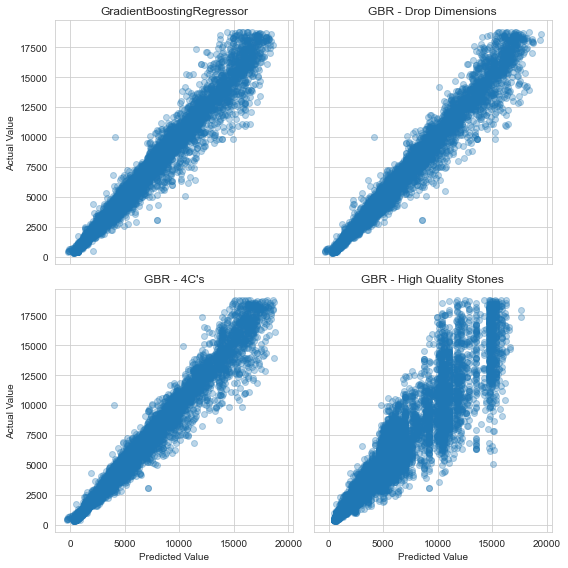

In [168]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,8))

ax[0,0].scatter(y_pred_GBR, y_test, alpha=0.3)
ax[0,1].scatter(y_pred_DimDrop, y_test, alpha=0.3)
ax[1,0].scatter(y_pred_4Cs, y_test, alpha=0.3)
ax[1,1].scatter(y_pred_HiQ, y_test, alpha=0.3)

ax[0,0].set_title('GradientBoostingRegressor')
ax[0,1].set_title('GBR - Drop Dimensions')
ax[1,0].set_title("GBR - 4C's")
ax[1,1].set_title('GBR - High Quality Stones')

for i, row in enumerate(ax):
    for j, cell in enumerate(row):
        if i == len(ax) - 1:
            cell.set_xlabel('Predicted Value')
        if j == 0:
            cell.set_ylabel('Actual Value')

plt.tight_layout()


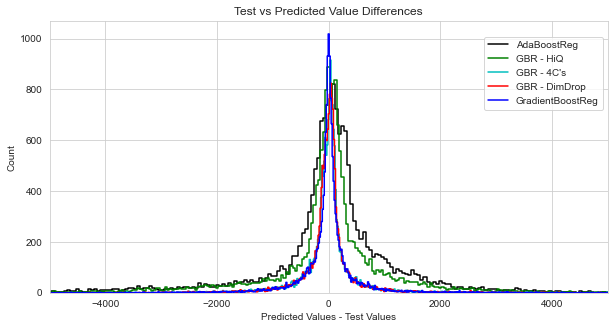

In [173]:
fig = plt.figure(figsize=(10,5))

sns.histplot(y_pred_Ada-y_test.values.ravel(), color='k', element='step', fill=False)
sns.histplot(y_pred_HiQ-y_test.values.ravel(), color='g', element='step', fill=False)
sns.histplot(y_pred_4Cs-y_test.values.ravel(), color='c', element='step', fill=False)
sns.histplot(y_pred_DimDrop-y_test.values.ravel(), color='r', element='step', fill=False)
sns.histplot(y_pred_GBR-y_test.values.ravel(), color='blue', element='step', fill=False)

plt.xlabel('Predicted Values - Test Values')
plt.title('Test vs Predicted Value Differences')
plt.xlim((-5000,5000))
fig.legend(labels=['AdaBoostReg','GBR - HiQ',"GBR - 4C's",'GBR - DimDrop','GradientBoostReg'],loc='upper right', bbox_to_anchor=(0.9, 0.85))
plt.show();

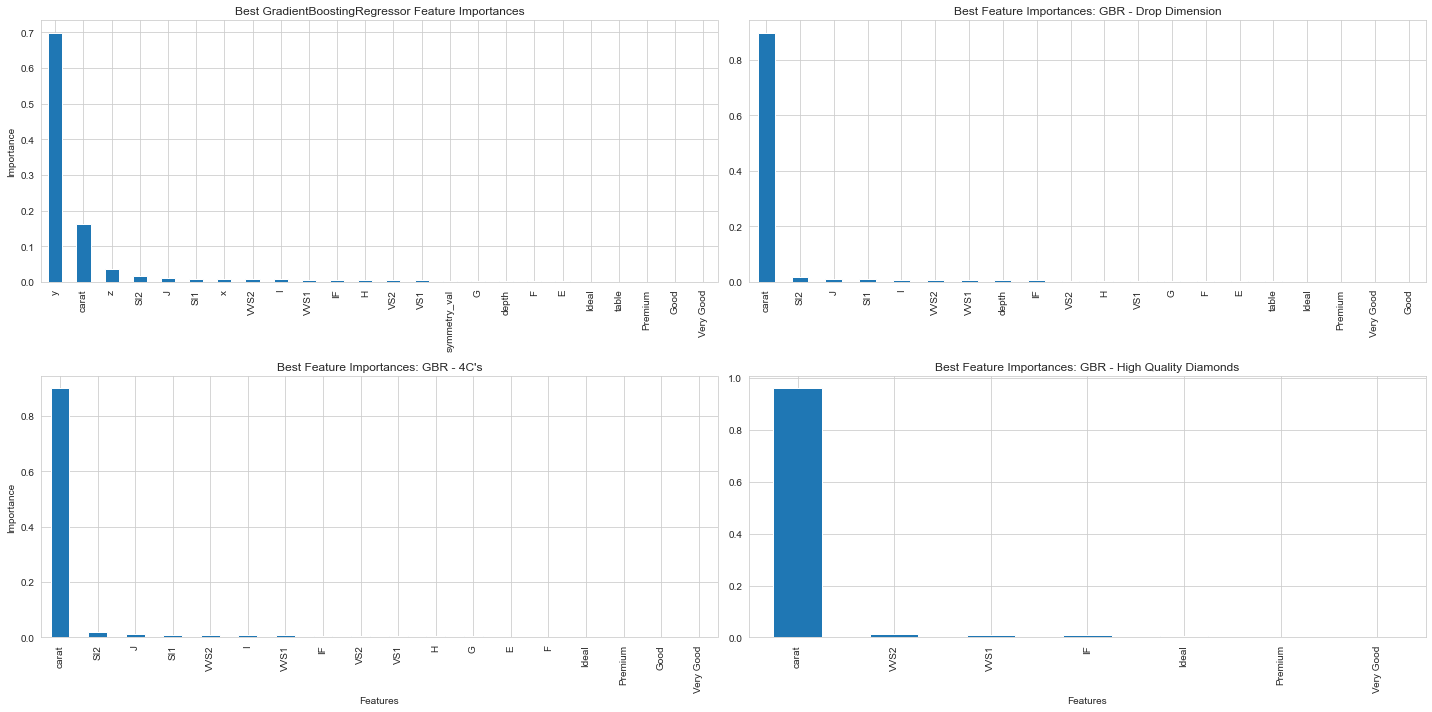

In [179]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))

imps_GBR = clf_GBR.best_estimator_.named_steps.gradientboostingregressor.feature_importances_
grb_feat_imps_GBR = pd.Series(imps_GBR, index=X_train.columns).sort_values(ascending=False)

imps_DimDrop = clf_GBR_DimDrop.best_estimator_.named_steps.gradientboostingregressor.feature_importances_
grb_feat_imps_DimDrop = pd.Series(imps_DimDrop, index=X_train_DimDrop.columns).sort_values(ascending=False)

imps_4Cs = clf_GBR_4Cs.best_estimator_.named_steps.gradientboostingregressor.feature_importances_
grb_feat_imps_4Cs = pd.Series(imps_4Cs, index=X_train_4Cs.columns).sort_values(ascending=False)

imps_HiQ = clf_GBR_HiQ.best_estimator_.named_steps.gradientboostingregressor.feature_importances_
grb_feat_imps_HiQ = pd.Series(imps_HiQ, index=X_train_HiQ.columns).sort_values(ascending=False)


grb_feat_imps_GBR.plot(kind='bar', ax=ax[0,0])
grb_feat_imps_DimDrop.plot(kind='bar', ax=ax[0,1])
grb_feat_imps_4Cs.plot(kind='bar', ax=ax[1,0])
grb_feat_imps_HiQ.plot(kind='bar', ax=ax[1,1])


ax[0,0].set_title('Best GradientBoostingRegressor Feature Importances')
ax[0,1].set_title('Best Feature Importances: GBR - Drop Dimension')
ax[1,0].set_title("Best Feature Importances: GBR - 4C's")
ax[1,1].set_title('Best Feature Importances: GBR - High Quality Diamonds')


for i, row in enumerate(ax):
    for j, cell in enumerate(row):
        if i == len(ax) - 1:
            cell.set_xlabel('Features')
        if j == 0:
            cell.set_ylabel('Importance')

plt.tight_layout();